In [1]:
import pandas as pd
import numpy as np
import timeit

from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib import colors

import scipy.stats

## Publication data

In [2]:
# authorPublicationData = pd.read_csv('data/author_publications_1970_2016_asiansAsNone.txt')
authorPublicationData = pd.read_csv('data/author_publications_2017_asiansAsNone.txt')
authorPublicationData.head()

,author,year,pub_id
0,graeme earl,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
1,gareth beale,2011,001c58d3-26ad-46b3-ab3a-c1e557d16821
2,m. nasser,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
3,faisal zaman,2009,001c8744-73c4-4b04-9364-22d31a10dbf1
4,altaf hossain,2009,001c8744-73c4-4b04-9364-22d31a10dbf1


In [3]:
author_year_numPub = authorPublicationData.groupby(['author', 'year'])['pub_id'].count()

In [4]:
author_year_numPub.head()

author                 year
'maseka lesaoana       2001    1
                       2015    1
(max) zong-ming cheng  2009    1
                       2011    1
(zhou) bryan bai       2011    1
Name: pub_id, dtype: int64

In [5]:
author_year_publications = authorPublicationData.groupby(['author', 'year'])['pub_id'].apply(list)

In [6]:
author_year_publications.head()

author                 year
'maseka lesaoana       2001    [4ff8ca7b-16b7-4bc8-b235-1eeac9b2aefa]
                       2015    [2a10f544-51ac-4261-8a26-cf61c1abdc03]
(max) zong-ming cheng  2009    [fe824193-57a4-48ed-a1d3-5eeb67929ae4]
                       2011    [fd54f6e8-4b10-471b-a1d0-3c784688a2a7]
(zhou) bryan bai       2011    [53d10a61-f01d-464e-b5e9-8242ed3b9e00]
Name: pub_id, dtype: object

## Author citation data (ids)

In [7]:
authorCitationsData = pd.read_csv('./data/citations_2017_asiansAsNone_cleaned.txt')

In [8]:
authorCitationsData.head()
print(authorCitationsData.shape)

(24976435, 3)


In [9]:
paper_citation_count = pd.read_csv('data/paper-citation-count.csv', index_col=0, header=None, squeeze=True)

## Author citation network, paper -> author

In [10]:
# authorCitationsData_with_cited_author = pd.read_csv('./data/authors_cited_by_papers_2017_asiansAsNone_by_daniel.txt')

In [11]:
# authorCitationsData_with_cited_author.head()

In [12]:
citations_year_auth = pd.read_csv('./data/authors_cite_2017_asiansAsNone_by_daniel_grouped.txt')

In [13]:
final_citation_count = citations_year_auth.groupby('author')['cit_count'].sum()

In [14]:
citations_year_auth = citations_year_auth.groupby(['author', 'year_cit'])['cit_count'].sum()

## Author career information

In [15]:
CAREER_LENGTH = 10

In [16]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-' + str(CAREER_LENGTH) + '-year.csv')

In [17]:
credible_authors.set_index('author', inplace=True, )

In [18]:
credible_authors.head()

,start_year,end_year,num_pub,career_length
author,,,,
'maseka lesaoana,2001,2015,2,15
a aart blokhuis,1992,2005,2,14
a min tjoa,1979,2017,191,39
a-imam al-sammak,1992,2006,3,15
a-xing zhu,1998,2017,22,20


## Early career analysis

In [19]:
# This part adds data to credible_authors file. This can be stored for later use. 

In [20]:
EARLY_CAREER_LEN = 3

In [21]:
def get_early_career_prod(row, num_years):
    early_prod = 0
    author = row.name
    start_year = row['start_year']
    year_num_pub = author_year_numPub[author]
    for year in range(num_years):
        if start_year + year in year_num_pub:
            early_prod += year_num_pub[start_year + year]
    return early_prod

In [22]:
credible_authors['early_career_prod'] = credible_authors.apply(lambda x: get_early_career_prod(x, EARLY_CAREER_LEN), axis=1)

In [23]:
# for testing extreme early productivity
# TODO remove this cell
credible_authors['early_career_prod_1'] = credible_authors.apply(lambda x: get_early_career_prod(x, 1), axis=1)

credible_authors['early_career_prod_2'] = credible_authors.apply(lambda x: get_early_career_prod(x, 2), axis=1)

In [24]:
def get_early_career_quality(row, num_years):
    early_pubs = []
    author = row.name
    start_year = row['start_year']
    year_pub_list = author_year_publications[author]
    for year in range(num_years):
        if start_year + year in year_pub_list:
            early_pubs.extend(year_pub_list[start_year + year])
    return sum([paper_citation_count[paper] for paper in early_pubs if paper in paper_citation_count])

In [25]:
credible_authors['early_career_qual'] = credible_authors.apply(lambda x: get_early_career_quality(x, EARLY_CAREER_LEN), axis=1)

In [213]:
early_pubs = ["001c58d3-26ad-46b3-ab3a-c1e557d16821", "49ec0c15-7a9d-4378-a26a-f5063567b519", "001c8744-73c4-4b04-9364-22d31a10dbf1"]

In [217]:
authorCitationsData[(authorCitationsData.id2.isin(early_pubs)) & (authorCitationsData.year_cit <= 2015)]

,id1,id2,year_cit
0,16870052-7e2e-4bbc-beeb-21e493bea221,001c58d3-26ad-46b3-ab3a-c1e557d16821,2015
1,49ec0c15-7a9d-4378-a26a-f5063567b519,001c8744-73c4-4b04-9364-22d31a10dbf1,2013
2,ae0b4e3d-305d-4fb8-9847-60dcc9a9ec44,001c8744-73c4-4b04-9364-22d31a10dbf1,2014


In [221]:
def get_early_career_recognition(row, num_years):
    early_pubs = []
    author = row.name
    start_year = row['start_year']
    year_pub_list = author_year_publications[author]
    for year in range(num_years):
        if start_year + year in year_pub_list:
            early_pubs.extend(year_pub_list[start_year + year])
    return authorCitationsData[(authorCitationsData.id2.isin(early_pubs)) & 
                               (authorCitationsData.year_cit < start_year + num_years)].shape[0]

In [ ]:
credible_authors['early_career_rec'] = credible_authors.apply(lambda x: get_early_career_recognition(x, EARLY_CAREER_LEN), axis=1)

In [26]:
credible_authors['final_citation_count'] = final_citation_count
credible_authors['final_citation_count'] = credible_authors['final_citation_count'].fillna(0)

### Save author data

In [27]:
# TODO Add gender to extended file

In [28]:
gender = pd.read_csv('./data/name_gender_2017_asiansAsNone_nodup.txt')
gender.set_index('name', inplace=True)

In [29]:
credible_authors['gender'] = gender

In [30]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_prod_1,early_career_prod_2,early_career_qual,final_citation_count,gender
author,,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,1,1,1,25,25.0,none
a aart blokhuis,1992,2005,2,14,1,1,1,0,0.0,none
a min tjoa,1979,2017,191,39,1,1,1,0,799.0,none
a-imam al-sammak,1992,2006,3,15,1,1,1,0,0.0,m
a-xing zhu,1998,2017,22,20,1,1,1,0,89.0,none


In [31]:
credible_authors.reset_index().to_csv('data/authors-scientific-atleast-' + str(CAREER_LENGTH) + '-year_extended.csv', 
                                      index=False)

## Test for errors in files

### Test if final citation count is working correctly

In [32]:
final_less_than_early = credible_authors[credible_authors.final_citation_count < credible_authors.early_career_qual].shape
assert final_less_than_early[0] == 0, "Final citation count is smaller than early in {} cases.".format(final_less_than_early[0])

In [33]:
credible_authors[credible_authors.final_citation_count < credible_authors.early_career_qual].head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_prod_1,early_career_prod_2,early_career_qual,final_citation_count,gender
author,,,,,,,,,,


In [206]:
# Look for authors with more than 20K citations. Are they famous?
authors_5k = credible_authors[credible_authors['final_citation_count'] > 5000]

In [207]:
authors_10k.index

Index(['robert w. heath jr.', 'robert tappan morris', 'shafi goldwasser',
       'sally floyd', 'peter n. belhumeur', 'ramesh govindan', 'rajeev alur',
       'david n. c. tse', 'david j. dewitt',
       'alberto l. sangiovanni-vincentelli',
       ...
       'michael stonebraker', 'robert endre tarjan', 'ronald r. yager',
       'adrian perrig', 'shuicheng yan', 'alexander j. smola',
       'klaus-robert müller', 'dieter fox', 'dacheng tao', 'jian pei'],
      dtype='object', name='author', length=183)

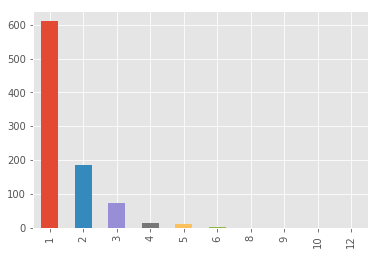

In [208]:
authors_5k.early_career_prod_1.value_counts().sort_index().plot(kind='bar')

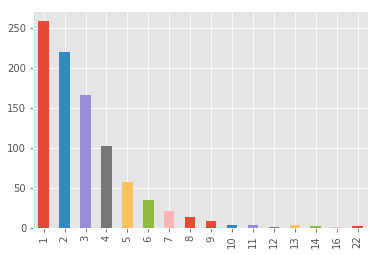

In [209]:
authors_5k.early_career_prod_2.value_counts().sort_index().plot(kind='bar')

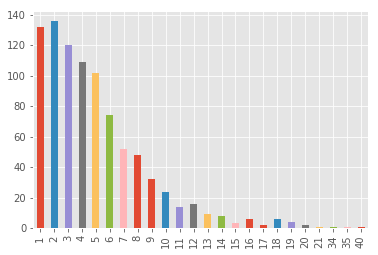

In [210]:
authors_5k.early_career_prod.value_counts().sort_index().plot(kind='bar')

In [211]:
#credible_authors.drop(authors_20k, inplace=True)

In [147]:
# Test for extremly high early productivity
credible_authors[(credible_authors.early_career_prod_1 >= 10)].shape

(41, 10)

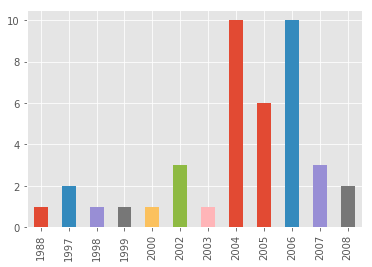

In [152]:
credible_authors[(credible_authors.early_career_prod_1 >= 10)].start_year.value_counts().sort_index().plot(kind='bar')

### Test gender files

In [39]:
gender = pd.read_csv('./data/name_gender_2017_asiansAsNone_nodup.txt')

In [40]:
gender_old = pd.read_csv('./data/name_gender_2017_asiansAsNone.txt')

In [41]:
# import pickle
# gender_id = pickle.load(open('./data/id_gender_2017_asiansAsNone.p', "rb" ) )
# doesnt work. Python 3 vs 2?

In [42]:
print(gender.shape)
print(gender_old.shape)

(1704919, 2)
(9471728, 2)


In [43]:
gender.head()

,name,gender
0,gareth beale,m
1,graeme earl,m
2,altaf hossain,m
3,faisal zaman,m
4,m. nasser,none


In [44]:
gender_old = gender_old.drop_duplicates()

In [45]:
gender_old[gender_old.name.str.contains("jorge santos")]

,name,gender
2770,jorge santos 1,m
96427,ricardo jorge santos,m
476406,jorge santos,m
786851,jorge santos 2,m
3648191,jorge santos 3,m
4285718,jorge santos 0002,m
6215007,camillo jorge santos oliveira,m
7611136,jorge santos simón,m
8420724,esdras jorge santos barboza,m


In [46]:
gender[gender.name.str.contains("jorge santos")]

,name,gender
2545,jorge santos 1,m
70490,ricardo jorge santos,m
248275,jorge santos,m
382652,jorge santos 2,m
1025928,jorge santos 3,m
1119603,jorge santos 0002,m
1337773,camillo jorge santos oliveira,m
1501066,jorge santos simón,m
1614512,esdras jorge santos barboza,m


In [47]:
## What is strange is that 'jorge santos 1' goes from none to 'm', but 'jorge santos' goes from 'm' to none

In [48]:
gender.groupby('gender').count()

,name
gender,
f,255793
m,796975
none,652151


In [49]:
gender_old.groupby('gender').count()

,name
gender,
f,255793
m,796975
none,652151


In [50]:
merged = gender.merge(gender_old, on='name', suffixes=('_new', '_old'))

In [51]:
merged.head()

,name,gender_new,gender_old
0,gareth beale,m,m
1,graeme earl,m,m
2,altaf hossain,m,m
3,faisal zaman,m,m
4,m. nasser,none,none


In [52]:
# Cases where we lose the gender by using new file ./data/name_gender_2017_asiansAsNone_nodup.txt
print(merged[(merged.gender_new != merged.gender_old) & (merged.gender_new!='none')])
print(merged[(merged.gender_new != merged.gender_old) & (merged.gender_new!='none')].shape)

Empty DataFrame
Columns: [name, gender_new, gender_old]
Index: []
(0, 3)


In [74]:
gender[gender.name.str.contains('michael r. smith')]

,name,gender
151887,michael r. smith 2,m
167781,michael r. smith 1,m
1344286,michael r. smith 0001,m
1627074,michael r. smith,m


#### Analyze people that have digits in their names

In [77]:
digits = gender[gender.name.str.contains('\d')]

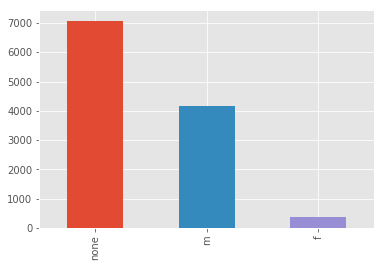

In [102]:
digits.gender.value_counts().plot(kind='bar')

In [82]:
authors_digits = credible_authors.reset_index().merge(digits, left_on='author', right_on='name')

In [155]:
digiAuthorPublicationData = authorPublicationData.merge(authors_digits, how="inner", on=["author"])

In [119]:
authors_digits.shape

(2807, 13)

In [169]:
print("Percentage of authors with numbers in names: ", authors_digits.shape[0]*100/credible_authors.shape[0])
print("Percentage of publications: ", authors_digits.num_pub.sum()*100/credible_authors.num_pub.sum())
print("Percentage of citations: ", authors_digits.final_citation_count.sum()*100/credible_authors.final_citation_count.sum())

Percentage of authors with numbers in names:  1.0977879982479195
Percentage of publications:  2.0619261100898827
Percentage of citations:  2.4855928704445573


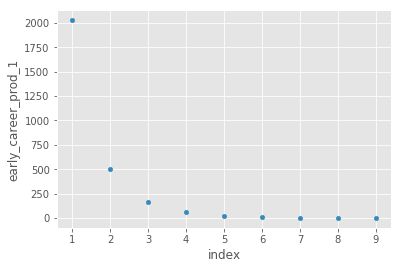

In [142]:
authors_digits.early_career_prod_1.value_counts().reset_index().plot(kind='scatter', x='index', y='early_career_prod_1')

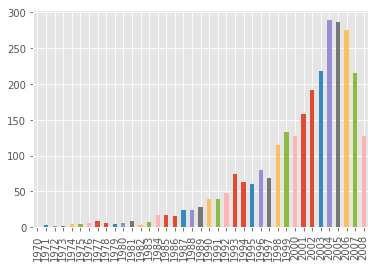

In [116]:
authors_digits.start_year.value_counts().sort_index().plot(kind='bar')

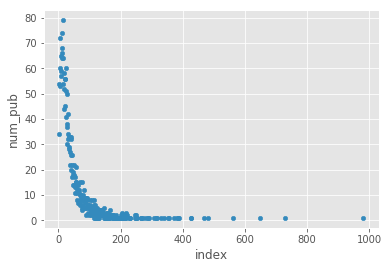

In [101]:
authors_digits.num_pub.value_counts().reset_index().plot(kind='scatter', x='index', y='num_pub')

In [190]:
authors_digits['pub_per_year'] = authors_digits.num_pub / authors_digits.career_length

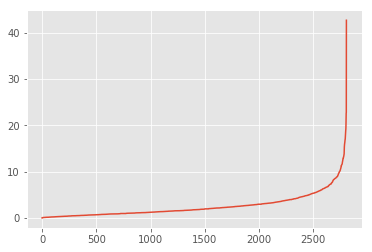

In [192]:
plt.plot(sorted(authors_digits['pub_per_year']))
plt.show()

In [193]:
authors_digits[authors_digits['pub_per_year'] > 10]

,author,start_year,end_year,num_pub,career_length,early_career_prod,early_career_prod_1,early_career_prod_2,early_career_qual,final_citation_count,gender_x,name,gender_y,pub_per_year
396,jan peters 1,2002,2017,219,16,1,1,1,2,2918.0,m,jan peters 1,m,13.687500
415,long wang 1,2000,2017,209,18,1,1,1,0,1894.0,none,long wang 1,none,11.611111
516,tao li 1,1999,2017,249,19,1,1,1,2053,6399.0,none,tao li 1,none,13.105263
529,vijay kumar 1,1989,2017,355,29,1,1,1,6,6241.0,m,vijay kumar 1,m,12.241379
575,yi pan 1,1988,2017,317,30,1,1,1,0,2182.0,none,yi pan 1,none,10.566667
687,jie yang 2,1996,2017,273,22,1,1,1,0,1307.0,none,jie yang 2,none,12.409091
717,jie wu 1,1989,2017,649,29,2,1,2,2,9289.0,none,jie wu 1,none,22.379310
727,jianmin wang 1,2000,2017,203,18,2,1,1,33,1615.0,none,jianmin wang 1,none,11.277778
752,jun zhang 3,2001,2017,174,17,2,1,1,7,1563.0,none,jun zhang 3,none,10.235294
814,satoshi nakamura 1,1990,2017,427,28,2,2,2,0,1605.0,m,satoshi nakamura 1,m,15.250000


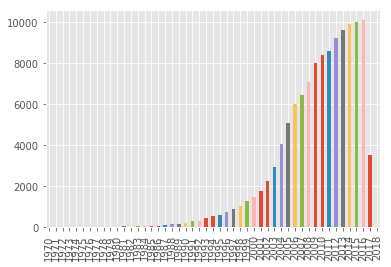

In [162]:
digiAuthorPublicationData.year.value_counts().sort_index().plot(kind='bar')

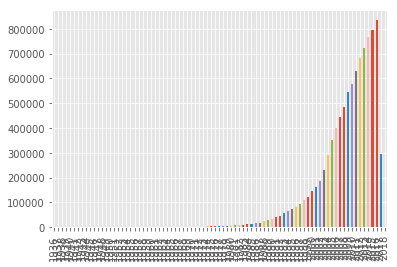

In [168]:
authorPublicationData.year.value_counts().sort_index().plot(kind='bar')

## Citations distribution (based on IDs file)

In [53]:
citation_distribution = credible_authors['final_citation_count'].value_counts().sort_index()

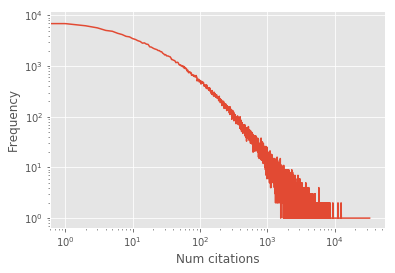

In [54]:
plt.loglog(citation_distribution.index, citation_distribution.values)
plt.xlabel('Num citations')
plt.ylabel('Frequency')
plt.show()

## Early Career Prod. vs Final Success (ID file)

In [55]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

In [56]:
x = credible_authors['early_career_prod']
y = credible_authors['final_citation_count']

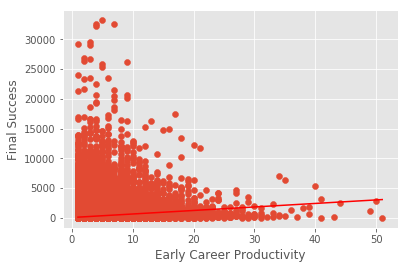

In [57]:
fig, ax = plt.subplots()
plt.scatter(x, y)
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
plt.xlabel('Early Career Productivity')
plt.ylabel('Final Success')
# plt.xlim(0, 50)
# plt.ylim(0,200)
plt.show()

In [58]:
credible_authors_no_uncited = credible_authors.dropna()

In [59]:
x = credible_authors_no_uncited['early_career_prod']
y = credible_authors_no_uncited['final_citation_count']

In [60]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value)
print(slope, intercept)

0.19789177372641392
59.03783777318879 68.98830972463583


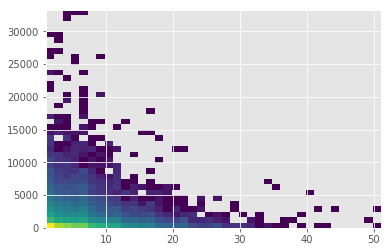

In [61]:
fig, axs = plt.subplots()
axs.hist2d(x, y, bins=40, norm=colors.LogNorm())
plt.show()

## Early Career Prod. vs Early Career Qual. (IDs file)

In [62]:
credible_authors.sort_values(by='early_career_prod', inplace=True)

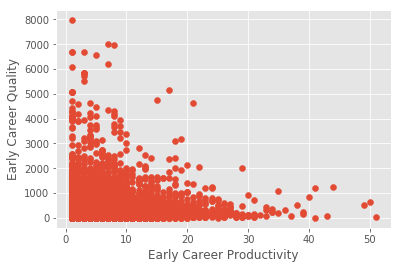

In [63]:
plt.scatter(credible_authors['early_career_prod'], credible_authors['early_career_qual'])
plt.xlabel('Early Career Productivity')
plt.ylabel('Early Career Quality')
plt.show()